# Implementing SELF-ORGANISING MAPS


##### Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import minisom as som

##### Importing the dataset

In [2]:
df = pd.read_csv(
    "E:/Pulkit Documents/Data Science/PRACTICE/GitHub Repos/Credit-Fraud-Detection-App/Data/Credit_Card_Applications.csv"
)
df

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [3]:
df.columns

Index(['CustomerID', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10', 'A11', 'A12', 'A13', 'A14', 'Class'],
      dtype='object')

In [15]:
# Slicing the df to X & y variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

##### Feature Scaliing 

In [16]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

#### Training the SOM Model

In [17]:
# Training the SOM
from minisom import MiniSom

som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=1000)

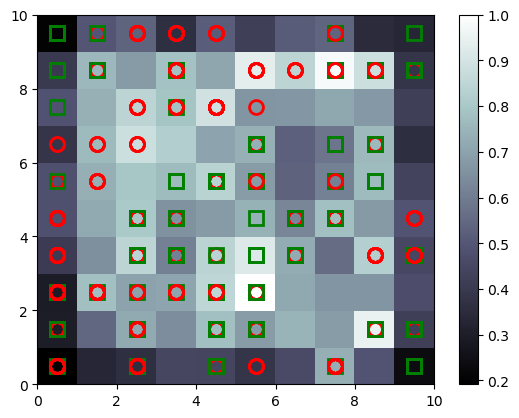

In [18]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ["o", "s"]
colors = ["r", "g"]
for i, x in enumerate(X):
    w = som.winner(x)
    plot(
        w[0] + 0.5,
        w[1] + 0.5,
        markers[y[i]],
        markeredgecolor=colors[y[i]],
        markerfacecolor="None",
        markersize=10,
        markeredgewidth=2,
    )
show()

#### Finding the Frauds

In [19]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8, 1)], mappings[(6, 8)]), axis=0)
frauds = sc.inverse_transform(frauds)

In [25]:
frauds.shape

(23, 15)

In [23]:
frauds_ = pd.DataFrame(
    frauds,
    columns=[
        "CustomerID",
        "A1",
        "A2",
        "A3",
        "A4",
        "A5",
        "A6",
        "A7",
        "A8",
        "A9",
        "A10",
        "A11",
        "A12",
        "A13",
        "A14",
    ],
)
frauds_

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,15621546.0,1.0,40.00,6.500,2.0,6.0,5.0,3.500,1.0,1.0,1.0,0.0,2.0,0.0,501.0
1,15677112.0,1.0,27.75,0.585,1.0,13.0,4.0,0.250,1.0,1.0,2.0,0.0,2.0,260.0,501.0
2,15636478.0,1.0,40.58,5.000,2.0,8.0,4.0,5.000,1.0,1.0,7.0,0.0,2.0,0.0,3066.0
3,15627699.0,1.0,22.67,1.585,1.0,9.0,4.0,3.085,1.0,1.0,6.0,0.0,2.0,80.0,1.0
4,15585192.0,1.0,30.83,0.000,2.0,9.0,4.0,1.250,1.0,1.0,1.0,0.0,2.0,202.0,1.0
5,15591552.0,1.0,35.17,2.500,2.0,4.0,4.0,4.500,1.0,1.0,7.0,0.0,2.0,150.0,1271.0
6,15622729.0,1.0,36.33,2.125,1.0,9.0,4.0,0.085,1.0,1.0,1.0,0.0,2.0,50.0,1188.0
7,15611318.0,1.0,24.83,2.750,2.0,8.0,4.0,2.250,1.0,1.0,6.0,0.0,2.0,184.0,601.0
8,15664083.0,1.0,38.58,3.335,2.0,9.0,4.0,4.000,1.0,1.0,14.0,0.0,2.0,383.0,1345.0
9,15622507.0,1.0,23.92,1.500,2.0,2.0,8.0,1.875,1.0,1.0,6.0,0.0,2.0,200.0,328.0


In [29]:
def som_(data):
    # Slicing

    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values

    # Scaling

    # Feature Scaling
    from sklearn.preprocessing import MinMaxScaler

    sc = MinMaxScaler(feature_range=(0, 1))
    X = sc.fit_transform(X)

    # Training
    som = MiniSom(x=10, y=10, input_len=X.shape[1], sigma=1.0, learning_rate=0.5)
    som.random_weights_init(X)
    som.train_random(data=X, num_iteration=1000)

    return som

In [30]:
som1 = som_(df)

In [32]:
def figure(som, X):
    # Visualizing the results
    from pylab import bone, pcolor, colorbar, plot, show

    bone()
    pcolor(som.distance_map().T)
    colorbar()
    markers = ["o", "s"]
    colors = ["r", "g"]
    for i, x in enumerate(X):
        w = som.winner(x)
        plot(
            w[0] + 0.5,
            w[1] + 0.5,
            markers[y[i]],
            markeredgecolor=colors[y[i]],
            markerfacecolor="None",
            markersize=10,
            markeredgewidth=2,
        )
    show()

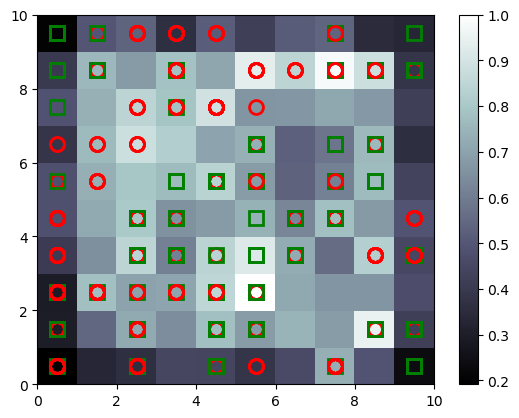

In [33]:
figure(som, X)